In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv')

In [6]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [7]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [8]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


# Air Pollution Forecasting
* In this tutorial, we are going to use the Air Quality dataset.
*
* This is a dataset that reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.
*
* The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. The complete feature list in the raw data is as follows:
*
* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* pm2.5: PM2.5 concentration
* DEWP: Dew Point
* TEMP: Temperature
* PRES: Pressure
* cbwd: Combined wind direction
* Iws: Cumulated wind speed
* Is: Cumulated hours of snow
* Ir: Cumulated hours of rain
* We can use this data and frame a forecasting problem where, given the weather conditions and pollution for prior hours, we forecast the pollution at the next hour.

In [9]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [10]:
df=df.drop(['No'],axis=1)

In [11]:
df.head(10)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [12]:
df['pm2.5'] = df['pm2.5'].fillna(0)

In [13]:
df

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [14]:
from datetime import datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [15]:
df= df.drop(['year','month','day','hour'],axis=1)


In [16]:
df
df['datetime'].nunique()

43824

In [17]:
# columns = df.columns.tolist()

# # Move the last column to the first position
# columns = [columns[-1]] + columns[:-1]

# # Reorder the DataFrame columns
# df = df[columns]

In [18]:
df

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,0.0,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,0.0,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,0.0,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,0.0,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,0.0,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00
43820,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00
43821,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00
43822,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00


In [19]:
# Set 'Datetime' column as index
df.set_index('datetime', inplace=True)
# manually specify column names
df.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']


In [20]:
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
datetime,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [21]:
df.isnull().sum()

pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

In [22]:
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
datetime,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [23]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg



In [24]:
from  sklearn.preprocessing import LabelEncoder
cat = df.select_dtypes(include='object')
le= LabelEncoder()

In [25]:
cat = le.fit_transform(cat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
df['wnd_dir']=cat

In [27]:
values = df.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0   0.279412   0.131148   0.545454   0.333333   0.002290   
2        0.0   0.279412   0.114754   0.527273   0.333333   0.007639   
3        0.0   0.279412   0.131148   0.509090   0.333333   0.010698   
4        0.0   0.279412   0.081967   0.509090   0.333333   0.016047   
5        0.0   0.294118   0.114754   0.490910   0.333333   0.021396   

   var7(t-1)  var8(t-1)  var1(t)   var2(t)   var3(t)   var4(t)   var5(t)  \
1        0.0        0.0      0.0  0.279412  0.114754  0.527273  0.333333   
2        0.0        0.0      0.0  0.279412  0.131148  0.509090  0.333333   
3        0.0        0.0      0.0  0.279412  0.081967  0.509090  0.333333   
4        0.0        0.0      0.0  0.294118  0.114754  0.490910  0.333333   
5        0.0        0.0      0.0  0.308824  0.147541  0.472727  0.333333   

    var6(t)  var7(t)  var8(t)  
1  0.007639      0.0      0.0  
2  0.010698      0.0      0.0  
3  0.016047      0.0

In [28]:
reframed['var1(t)'].value_counts()

var1(t)
0.000000    2068
0.016097     626
0.011066     596
0.013078     589
0.012072     578
            ... 
0.561368       1
0.985915       1
0.493964       1
0.527163       1
0.583501       1
Name: count, Length: 581, dtype: int64

In [29]:
values

array([[  0.  , -21.  , -11.  , ...,   1.79,   0.  ,   0.  ],
       [  0.  , -21.  , -12.  , ...,   4.92,   0.  ,   0.  ],
       [  0.  , -21.  , -11.  , ...,   6.71,   0.  ,   0.  ],
       ...,
       [ 10.  , -22.  ,  -3.  , ..., 242.7 ,   0.  ,   0.  ],
       [  8.  , -22.  ,  -4.  , ..., 246.72,   0.  ,   0.  ],
       [ 12.  , -21.  ,  -3.  , ..., 249.85,   0.  ,   0.  ]],
      dtype=float32)

In [30]:
# values = reframed.values
# total_rows = values.shape[0]
# split_index = total_rows // 2
# train = values[:split_index,:]
# test = values[split_index:, :]
# # split into input and outputs
# train_X, train_y = train[:, :-1], train[:, -1]
# test_X, test_y = test[:, :-1], test[:, -1]
# # reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [31]:
import matplotlib.pyplot  as plt

In [32]:
# from math import sqrt
# from numpy import concatenate
# from matplotlib import pyplot
# from pandas import read_csv
# from pandas import DataFrame
# from pandas import concat
# ...
# # make a prediction
# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]))
# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0   0.279412   0.131148   0.545454   0.333333   0.002290   
2        0.0   0.279412   0.114754   0.527273   0.333333   0.007639   
3        0.0   0.279412   0.131148   0.509090   0.333333   0.010698   
4        0.0   0.279412   0.081967   0.509090   0.333333   0.016047   
5        0.0   0.294118   0.114754   0.490910   0.333333   0.021396   

   var7(t-1)  var8(t-1)  var1(t)  
1        0.0        0.0      0.0  
2        0.0        0.0      0.0  
3        0.0        0.0      0.0  
4        0.0        0.0      0.0  
5        0.0        0.0      0.0  
(21911, 1, 8) (21911,) (21912, 1, 8) (21912,)
Epoch 1/20
305/305 - 5s - loss: 0.0432 - val_loss: 0.0314 - 5s/epoch - 15ms/step
Epoch 2/20
305/305 - 1s - loss: 0.0171 - val_loss: 0.0149 - 1s/epoch - 5ms/step
Epoch 3/20
305/305 - 1s - loss: 0.0144 - val_loss: 0.0134 - 1s/epoch - 5ms/step
Epoch 4/20
305/305 - 1s - loss: 0.0144 - val_loss: 0.0134 - 1s/epoch - 5ms/s

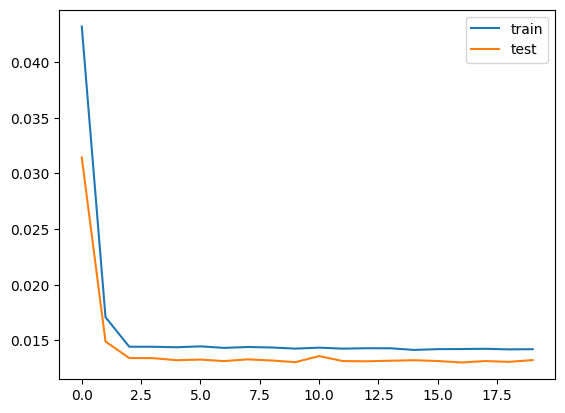

685/685 [==============================] - 2s 2ms/step
Test RMSE: 25.754


In [33]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset

values = df.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
total_rows = values.shape[0]
split_index = total_rows // 2
train = values[:split_index,:]
test = values[split_index:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [34]:
train_X.shape[1]

1

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true contains the actual target values and y_pred contains the predicted values
mae = mean_absolute_error(inv_y, inv_yhat)
mse = mean_squared_error(inv_y, inv_yhat)
rmse = mean_squared_error(inv_y, inv_yhat, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
accurcay = r2_score(inv_y, inv_yhat)
accurcay

Mean Absolute Error (MAE): 13.143664
Mean Squared Error (MSE): 663.24286
Root Mean Squared Error (RMSE): 25.753502


0.9231371359117657

In [36]:
yhat1 = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
                          # invert scaling for forecast train
from numpy import concatenate
inv_yhat1 = concatenate((yhat1, train_X[:, 1:]), axis=1)
inv_yhat1 = scaler.inverse_transform(inv_yhat1)
inv_yhat1 = inv_yhat1[:,0]
                          # invert scaling for actual train
train_y = train_y.reshape((len(train_y), 1))
inv_y1 = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_y1 = scaler.inverse_transform(inv_y1)
inv_y1 = inv_y1[:,0]

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true contains the actual target values and y_pred contains the predicted values
mae = mean_absolute_error(inv_y1, inv_yhat1)
mse = mean_squared_error(inv_y1, inv_yhat1)
rmse = mean_squared_error(inv_y1, inv_yhat1, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
accurcay1 = r2_score(inv_y1, inv_yhat1)
accurcay1

685/685 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 14.066988
Mean Squared Error (MSE): 827.81287
Root Mean Squared Error (RMSE): 28.771738


0.9013467407775766

   var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  var6(t-2)  \
2        0.0   0.279412   0.131148   0.545454   0.333333   0.002290   
3        0.0   0.279412   0.114754   0.527273   0.333333   0.007639   
4        0.0   0.279412   0.131148   0.509090   0.333333   0.010698   
5        0.0   0.279412   0.081967   0.509090   0.333333   0.016047   
6        0.0   0.294118   0.114754   0.490910   0.333333   0.021396   

   var7(t-2)  var8(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  \
2        0.0        0.0        0.0   0.279412   0.114754   0.527273   
3        0.0        0.0        0.0   0.279412   0.131148   0.509090   
4        0.0        0.0        0.0   0.279412   0.081967   0.509090   
5        0.0        0.0        0.0   0.294118   0.114754   0.490910   
6        0.0        0.0        0.0   0.308824   0.147541   0.472727   

   var5(t-1)  var6(t-1)  var7(t-1)  var8(t-1)  var1(t)  
2   0.333333   0.007639        0.0        0.0      0.0  
3   0.333333   0.010698        0

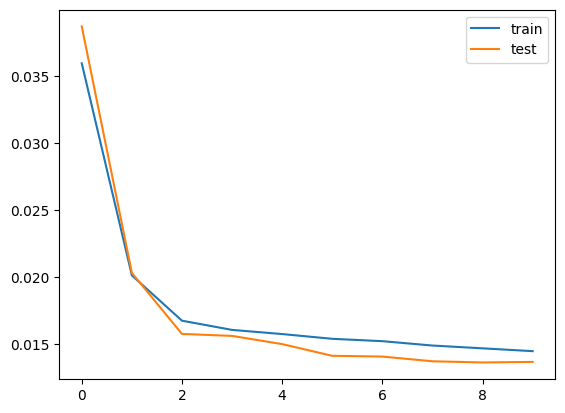

In [37]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset

values = df.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 2, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[17,18,19,20,21,22,23]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
values = reframed.values
total_rows = values.shape[0]
split_index = total_rows // 2
train = values[:split_index,:]
test = values[split_index:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()




In [38]:
test_X[:, :].shape


(21911, 1, 16)

In [39]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))




685/685 [==============================] - 2s 2ms/step


In [40]:
test_X.shape

(21911, 16)

In [41]:
yhat.shape



(21911, 1)

In [42]:
# invert scaling for forecast
# For t-2, t-1 timestamps
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat =inv_yhat.reshape(-1,8)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]


In [43]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y.reshape(-1,8)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 18.215


In [44]:
yhat1 = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
                          # invert scaling for forecast train
from numpy import concatenate
inv_yhat1 = concatenate((yhat1, train_X[:, 1:]), axis=1)
# inv_yhat1 = inv_yhat1.reshape(-1,8)
# inv_yhat1 = scaler.inverse_transform(inv_yhat1)
inv_yhat1 = inv_yhat1[:,0]
                          # invert scaling for actual train
train_y = train_y.reshape((len(train_y), 1))
inv_y1 = concatenate((train_y, train_X[:, 1:]), axis=1)
# inv_y1 = inv_y1.reshape(-1,8)
# inv_y1 = scaler.inverse_transform(inv_y1)
inv_y1 = inv_y1[:,0]

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true contains the actual target values and y_pred contains the predicted values
mae = mean_absolute_error(inv_y1, inv_yhat1)
mse = mean_squared_error(inv_y1, inv_yhat1)
rmse = mean_squared_error(inv_y1, inv_yhat1, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
accurcay1 = r2_score(inv_y1, inv_yhat1)
accurcay1

685/685 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 0.014641203
Mean Squared Error (MSE): 0.00083881826
Root Mean Squared Error (RMSE): 0.028962359


0.9012325878591703